# Data Challenges - Maven Slopes Challenge

• Overview • Data Cleaning and Preparation • Initial Data Exploration • Python-based Data Visualization • Key Findings

### Overview

I used Python to perform exploratory data analysis on the ski resorts dataset, analyzing its distribution by location, popular ski seasons, and correlations between various attributes. Insights gained informed the creation of an interactive dashboard for skiers. Python's data manipulation and visualization libraries were crucial for extracting meaningful insights and meeting the requirements of the Macen Slope Challenge.

### Dataset Description

The Maven Slope Challenge dataset comprises two CSV tables: Resorts and Snow. The Resorts table includes information on 499 ski resorts worldwide, such as location, lifts, slopes, prices, and ski season. Each resort has a unique ID, and details include the number of slopes, total slope length, vertical drop, number of lifts, lift ticket prices, opening and closing dates, and ski season duration.

### Data Cleaning and Preparation

Let's begin by importing the necessary libraries.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Read in the data and display the first 5 rows
resorts = pd.read_excel("/Users/DunsinAgbolabori1/Desktop/mavenslopechallenge/data/resorts.xlsx")
snow = pd.read_excel("/Users/DunsinAgbolabori1/Desktop/mavenslopechallenge/data/snow.xlsx")

display(resorts.head())
display(snow.head())

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,...,123,4,4,3,11,16240,Yes,No,No,No
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,...,0,2,5,1,8,9200,Yes,Yes,Yes,No
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,...,150,14,3,1,18,21060,Yes,Yes,Yes,No


,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.28
1,2022-12-01,63.125,69.125,100.00
2,2022-12-01,63.125,69.375,100.00
3,2022-12-01,63.125,69.625,100.00
4,2022-12-01,63.125,69.875,100.00


The process of Data Cleaning and Preparation will consist of two primary stages:

- Evaluating the data for any issues or inconsistencies
- Rectifying or cleaning the data to address the identified issues.

To verify the dimensions of the dataframes, we can use the "shape" attribute.

In [3]:
print(resorts.shape)
print(snow.shape)

(499, 25)
(820522, 4)


Get more information about the dataframe and determine if null values exists

In [4]:
print(resorts.info())
print(snow.info())

if resorts.isnull().any().any() or snow.isnull().any().any():
    print('At least one of the DataFrames has null values')
else:
    print('Neither DataFrame has null values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   499 non-null    int64  
 1   Resort               499 non-null    object 
 2   Latitude             499 non-null    float64
 3   Longitude            499 non-null    float64
 4   Country              499 non-null    object 
 5   Continent            499 non-null    object 
 6   Price                499 non-null    int64  
 7   Season               499 non-null    object 
 8   Highest point        499 non-null    int64  
 9   Lowest point         499 non-null    int64  
 10  Beginner slopes      499 non-null    int64  
 11  Intermediate slopes  499 non-null    int64  
 12  Difficult slopes     499 non-null    int64  
 13  Total slopes         499 non-null    int64  
 14  Longest run          499 non-null    int64  
 15  Snow cannons         499 non-null    int

- Looks like this dataset is cleaner than a brand new whistle! There are no null values to be found anywhere!

Determine the distinct count of resorts, country, continent and seasons.

In [5]:
print(resorts['Resort'].nunique(), 'resorts,', 
      resorts['Country'].nunique(), 'countries,', 
      resorts['Continent'].nunique(), 'continents',
      resorts['Season'].nunique(), 'seasons'
      )

499 resorts, 38 countries, 5 continents 31 seasons


## Data cleaning & Preparation

Some slight adjustments

- Renaming the columns

In [6]:
resorts.columns = resorts.columns.str.replace(' ', '_').str.lower()
snow.columns = snow.columns.str.replace(' ', '_').str.lower()

print(resorts.columns)
print(snow.columns)

Index(['id', 'resort', 'latitude', 'longitude', 'country', 'continent',
       'price', 'season', 'highest_point', 'lowest_point', 'beginner_slopes',
       'intermediate_slopes', 'difficult_slopes', 'total_slopes',
       'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
       'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
       'snowparks', 'nightskiing', 'summer_skiing'],
      dtype='object')
Index(['month', 'latitude', 'longitude', 'snow'], dtype='object')


-- All columns seem quite important to the EDA, hence I will retain all columns

- New column which will represent abbreviations for the countries

In [7]:
def get_country_abbr(country):
    if country == 'United States':
        return 'USA'
    elif country == 'Austria':
        return 'AUT'
    else:
        return country[:3].upper()

# create new column with country abbreviation
resorts['country_abbr'] = resorts['country'].apply(get_country_abbr)
print(resorts['country_abbr'].unique())

['NOR' 'AUT' 'CAN' 'NEW' 'CHI' 'GER' 'SWI' 'ITA' 'FRA' 'UNI' 'USA' 'AND'
 'AUS' 'ARG' 'FIN' 'JAP' 'SLO' 'BUL' 'SPA' 'SWE' 'LEB' 'RUS' 'UKR' 'GEO'
 'SER' 'TUR' 'POL' 'BOS' 'CZE' 'IRA' 'SOU' 'ROM' 'GRE' 'LIE' 'LIT' 'KAZ']


- Clean the resort name

In [8]:
def clean_resort_name(resort):
    cleaned_name = resort.strip().replace("?", "").replace("ñ", "-").replace("Ë", "e").replace("È", "e")
    cleaned_name = re.sub(r'\([^)]*\)', '', cleaned_name)
    cleaned_name = cleaned_name.title()
    return cleaned_name

resort_name = "Valchiavenna ñ Madesimo/?Campodolcino"
cleaned_name = clean_resort_name(resort_name)
print(cleaned_name)

#apply this function to each resort name in your dataset
resorts['resort'] = resorts['resort'].apply(clean_resort_name)
print(resorts['resort'])

Valchiavenna - Madesimo/Campodolcino
0                                           Hemsedal
1                                   Geilosiden Geilo
2                                               Golm
3                       Red Mountain Resort-Rossland
4                                            Hafjell
                           ...                      
494                                          Puigmal
495                             Kranzberg-Mittenwald
496    Wetterstein Lifts-Wettersteinbahnen-- Ehrwald
497                     Stuhleck-Spital Am Semmering
498                                        Le Massif
Name: resort, Length: 499, dtype: object


## Initial Data Exploration

The EDA involves employing a range of techniques such as data visualization and statistical analysis to extract insights from the data, detect patterns, and establish connections between different variables.

- A plot showing the distribution of prices for each resort in the dataset

<Figure size 700x300 with 0 Axes>

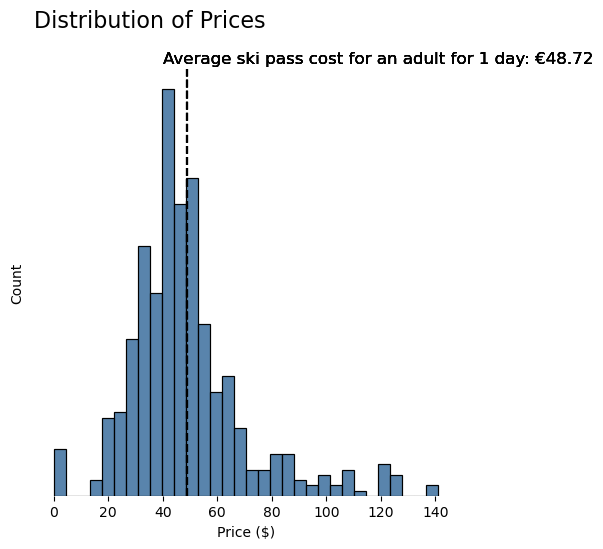

In [9]:
plt.figure(figsize=(7, 3))
sns.displot(resorts['price'], kde=False, color='#225B91')
plt.title('Distribution of Prices', fontsize = 16, loc='left', pad=30)
plt.xlabel('Price ($)')
plt.ylabel('Count')
for s in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[s].set_visible(False)
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.gca().axvline(resorts['price'].mean(), color='black', linestyle='--')
    label = 'Average ski pass cost for an adult for 1 day: €{:.2f}'.format(resorts['price'].mean())
    plt.text(resorts['price'].mean()+5, 0, label, color='black', fontsize=12, position=(40, 83))
plt.show()

- Box plot of lift capacity by continent

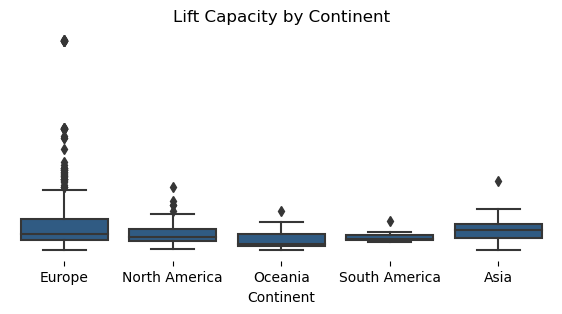

In [10]:
plt.figure(figsize=(7, 3))
sns.boxplot(x='continent', y='lift_capacity', data=resorts, color='#225B91')
plt.title('Lift Capacity by Continent')
plt.xlabel('Continent')
plt.ylabel('')
for s in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[s].set_visible(False)
    plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

These outliers represent ski resorts with a much higher lift capacity than the majority of the resorts in Europe.

- Scatterplot showing the correlation between Ski Cost (Price) and Highest point

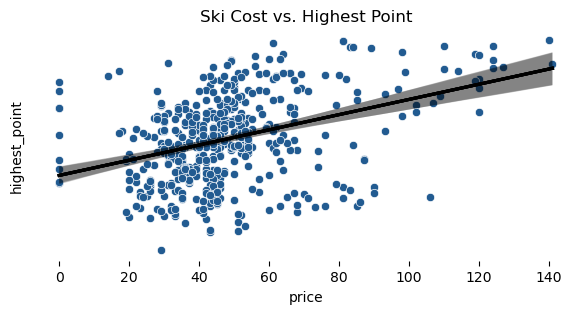

In [11]:
plt.figure(figsize=(7, 3))
sns.scatterplot(x='price', y='highest_point', data=resorts, color='#225B91')
plt.title('Ski Cost vs. Highest Point')
plt.xlabel('Price')
plt.ylabel('')
for s in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[s].set_visible(False)
    plt.gca().axes.get_yaxis().set_ticks([])
    sns.regplot(x='price', y='highest_point', data=resorts, scatter=False, color='black')
plt.show()

- A pivot table that shows number of resorts per country with a focus on the top 10.

In [12]:
resorts_per_country = resorts.pivot_table(index='country_abbr', values='resort', aggfunc='count').sort_values('resort', ascending=False)
display(resorts_per_country.head(10))

,resort
country_abbr,
AUT,89
FRA,81
USA,78
SWI,59
ITA,44
GER,22
CAN,20
JAP,14
NOR,10


- Plot a bar chart of the top 10 countries with the most resorts

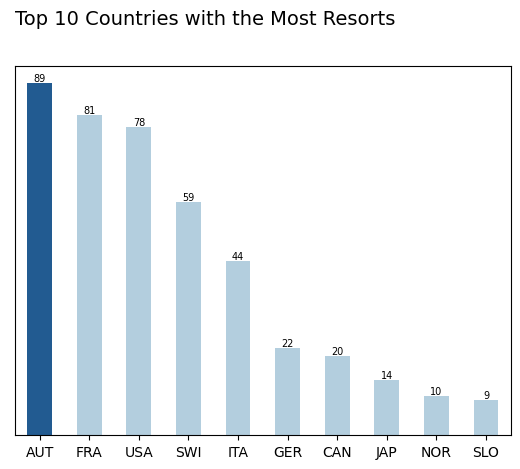

In [13]:
plt1 = resorts_per_country.head(10).plot(kind='bar', legend=False)
plt1.set_title('Top 10 Countries with the Most Resorts', fontsize = 14, loc='left', pad=30)
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=7)
plt1.set_xlabel('')
plt1.set_yticks([], [])
plt1.tick_params(axis='x', rotation=0)
plt1.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt1.patches[i].set_facecolor('#B3CEDE')

- A pivot table showing average ski pass cost (for 1 adult for 1 day) per country

In [14]:
avg_price_per_country = resorts.pivot_table(index='country_abbr', values='price', aggfunc='mean')
avg_price_per_country = avg_price_per_country.sort_values('price', ascending=False)
avg_price_per_country.index = avg_price_per_country.index.str[:3].str.upper()
avg_price_per_country = avg_price_per_country.round(2)
display(avg_price_per_country.head(10))

,price
country_abbr,
USA,81.17
NEW,65.60
AUS,61.00
CAN,60.60
SWI,53.03
LEB,51.00
CHI,50.33
ARG,47.50
AUT,44.25


- Plot a bar chart of the average prices per country

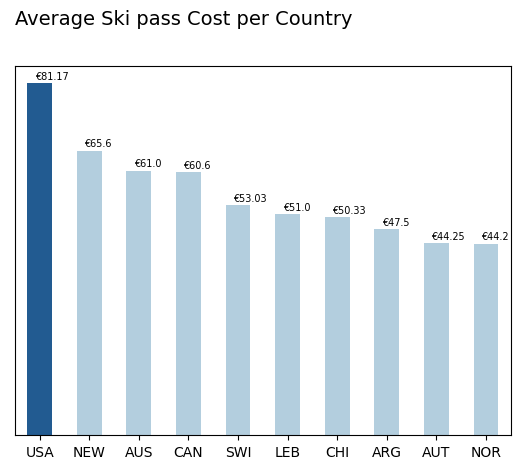

In [15]:
plt2 = avg_price_per_country.head(10).plot(kind='bar', legend=False)
plt2.set_title('Average Ski pass Cost per Country', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(avg_price_per_country['price'][:10]):
    plt2.text(i-.1, v+1, '€'+str(v), color='black', fontsize=7)
plt2.set_xlabel('')
plt2.set_yticks([], [])
plt2.tick_params(axis='x', rotation=0)
plt2.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt2.patches[i].set_facecolor('#B3CEDE')


- A pivot table that shows number of resorts per continents.

In [16]:
resorts_per_continent = resorts.pivot_table(index='continent', values='resort', aggfunc='count')
resorts_per_continent = resorts_per_continent.sort_values('resort', ascending=False)
display(resorts_per_continent)

counts = resorts_per_continent['resort']
counts

,resort
continent,
Europe,360
North America,98
Asia,24
Oceania,10
South America,7


continent
Europe           360
North America     98
Asia              24
Oceania           10
South America      7
Name: resort, dtype: int64

- Plot a bar chart of the resorts per continent

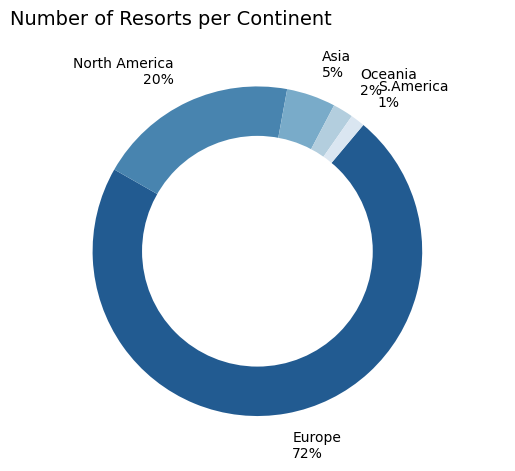

In [17]:
fig, ax = plt.subplots()
colors = ['#225B91', '#4884AF', '#79ABC9', '#B3CEDE', '#DAE6F1']
label = ['Europe\n72%', 'North America\n20%', 'Asia\n5%', 'Oceania\n2%', 'S.America\n1%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Number of Resorts per Continent', fontsize = 14, loc='left', pad=30)
ax.axis('equal')
plt.show()

- A pivot table showing average ski pass cost (for 1 adult for 1 day) per country

In [18]:
avg_price_per_continent = resorts.pivot_table(index='continent', values='price', aggfunc='mean')
avg_price_per_continent = avg_price_per_continent.sort_values('price', ascending=False)
avg_price_per_continent = avg_price_per_continent.round(2)
display(avg_price_per_continent)

,price
continent,
North America,76.97
Oceania,63.30
South America,56.71
Europe,41.55
Asia,32.58


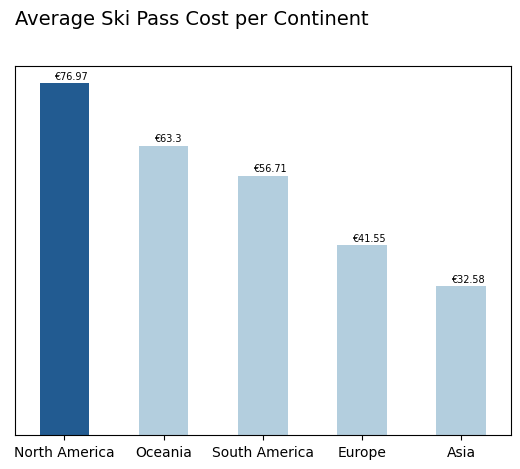

In [19]:
plt4 = avg_price_per_continent.plot(kind='bar', legend=False)
plt4.set_title('Average Ski Pass Cost per Continent', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(avg_price_per_continent['price']):
    plt4.text(i-.1, v+1, '€'+str(v), color='black', fontsize=7)
plt4.set_xlabel('')
plt4.set_yticks([], [])
plt4.tick_params(axis='x', rotation=0)
plt4.patches[0].set_facecolor('#225B91')
for i in range(1, 5):
    plt4.patches[i].set_facecolor('#B3CEDE')

- A pivot chart to show the average ski cost pass per season (Top 10 most expensive seasons)

In [20]:
avg_price_per_season = resorts.pivot_table(index='season', values='price', aggfunc='mean')
avg_price_per_season = avg_price_per_season.sort_values('price', ascending=False)
avg_price_per_season = avg_price_per_season.round(2)
display(avg_price_per_season.head(10))

,price
season,
November - June,114.00
May - October,87.00
"November - May, June - August",74.50
June - September,69.00
November - April,64.14
October - June,63.00
July - April,63.00
October - April,62.20
Year-round,60.75


- A pivot for top 10 most expensive/costly ski resorts

In [21]:
top_10_most_expensive_resorts = resorts.sort_values('price', ascending=False).head(10)
display(top_10_most_expensive_resorts[['resort', 'price', 'country_abbr', 'continent']])

,resort,price,country_abbr,continent
93,Beaver Creek,141,USA,North America
97,Breckenridge,140,USA,North America
90,Vail,127,USA,North America
154,Snowmass,124,USA,North America
87,Aspen Mountain,124,USA,North America
88,Aspen Highlands,124,USA,North America
199,Northstar California Resort,120,USA,North America
21,Steamboat,120,USA,North America
165,Keystone,120,USA,North America
202,Heavenly,120,USA,North America


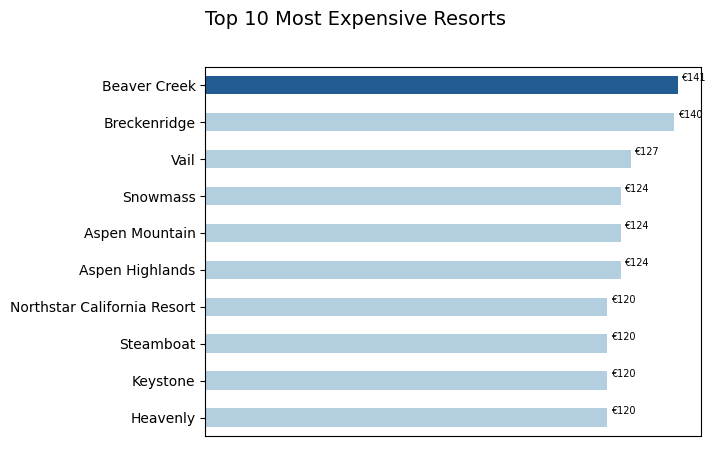

In [22]:
plt5 = top_10_most_expensive_resorts.plot(kind='barh', x='resort', y='price', legend=False)
plt5.set_title('Top 10 Most Expensive Resorts', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(top_10_most_expensive_resorts['price']):
    plt5.text(v+1, i-.1, '€'+str(v), color='black', fontsize=7)
plt5.set_xlabel('')
plt5.set_xticks([], [])
plt5.tick_params(axis='y', rotation=0)
plt5.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt5.patches[i].set_facecolor('#B3CEDE')
    plt5.invert_yaxis()
    plt5.set_ylabel('')

- A pivot chart to display country by beginner slopes percentage

In [23]:
beginner_slopes_per_country = resorts.pivot_table(index='country_abbr', values='beginner_slopes', aggfunc='mean')
beginner_slopes_per_country = beginner_slopes_per_country.sort_values('beginner_slopes', ascending=False)
beginner_slopes_per_country = beginner_slopes_per_country.round(2)
display(beginner_slopes_per_country.head(10))

,beginner_slopes
country_abbr,
FRA,74.90
AND,68.80
LEB,46.00
SPA,40.75
SWI,31.39
AUT,30.91
SER,30.00
ITA,27.09
UKR,26.00


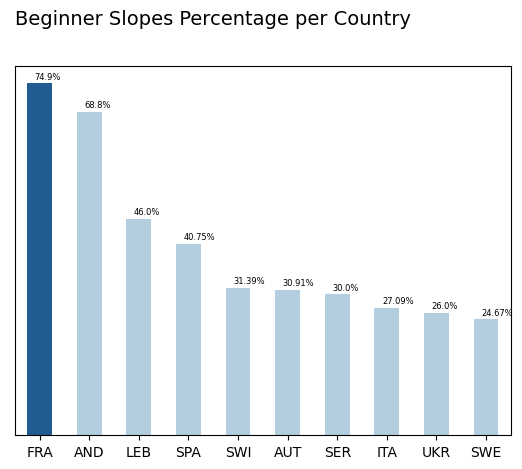

In [24]:
plt6 = beginner_slopes_per_country.head(10).plot(kind='bar', legend=False)
plt6.set_title('Beginner Slopes Percentage per Country', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(beginner_slopes_per_country.head(10)['beginner_slopes']):
    plt6.text(i-.1, v+1, str(v)+'%', color='black', fontsize=6)
plt6.set_xlabel('')
plt6.set_yticks([], [])
plt6.tick_params(axis='x', rotation=0)
plt6.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt6.patches[i].set_facecolor('#B3CEDE')

- A pivot table to display country by difficult slope percentage

In [25]:
difficult_slope_percentage = resorts.pivot_table(index='country_abbr', values='difficult_slopes', aggfunc='mean')
difficult_slope_percentage = difficult_slope_percentage.sort_values('difficult_slopes', ascending=False)
difficult_slope_percentage = difficult_slope_percentage.round(2)
display(difficult_slope_percentage.head(10))

,difficult_slopes
country_abbr,
CAN,35.70
USA,32.55
ARG,32.50
AND,22.00
FRA,19.32
SWI,16.36
AUS,12.80
ITA,12.59
SPA,12.38


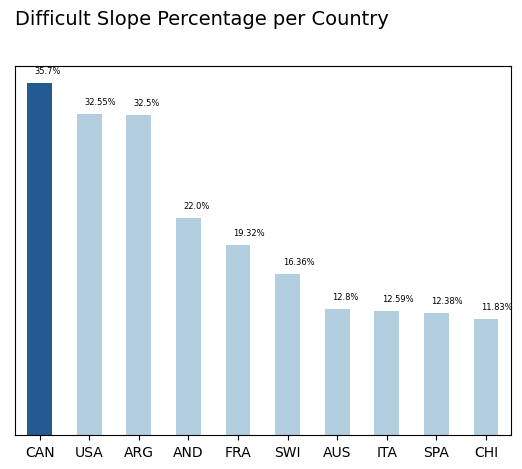

In [26]:
plt7 = difficult_slope_percentage.head(10).plot(kind='bar', legend=False)
plt7.set_title('Difficult Slope Percentage per Country', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(difficult_slope_percentage.head(10)['difficult_slopes']):
    plt7.text(i-.1, v+1, str(v)+'%', color='black', fontsize=6)
plt7.set_xlabel('')
plt7.set_yticks([], [])
plt7.tick_params(axis='x', rotation=0)
plt7.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt7.patches[i].set_facecolor('#B3CEDE')

- KPIs for evaluating overall performance of ski resorts.

## Python-based Data Visualization

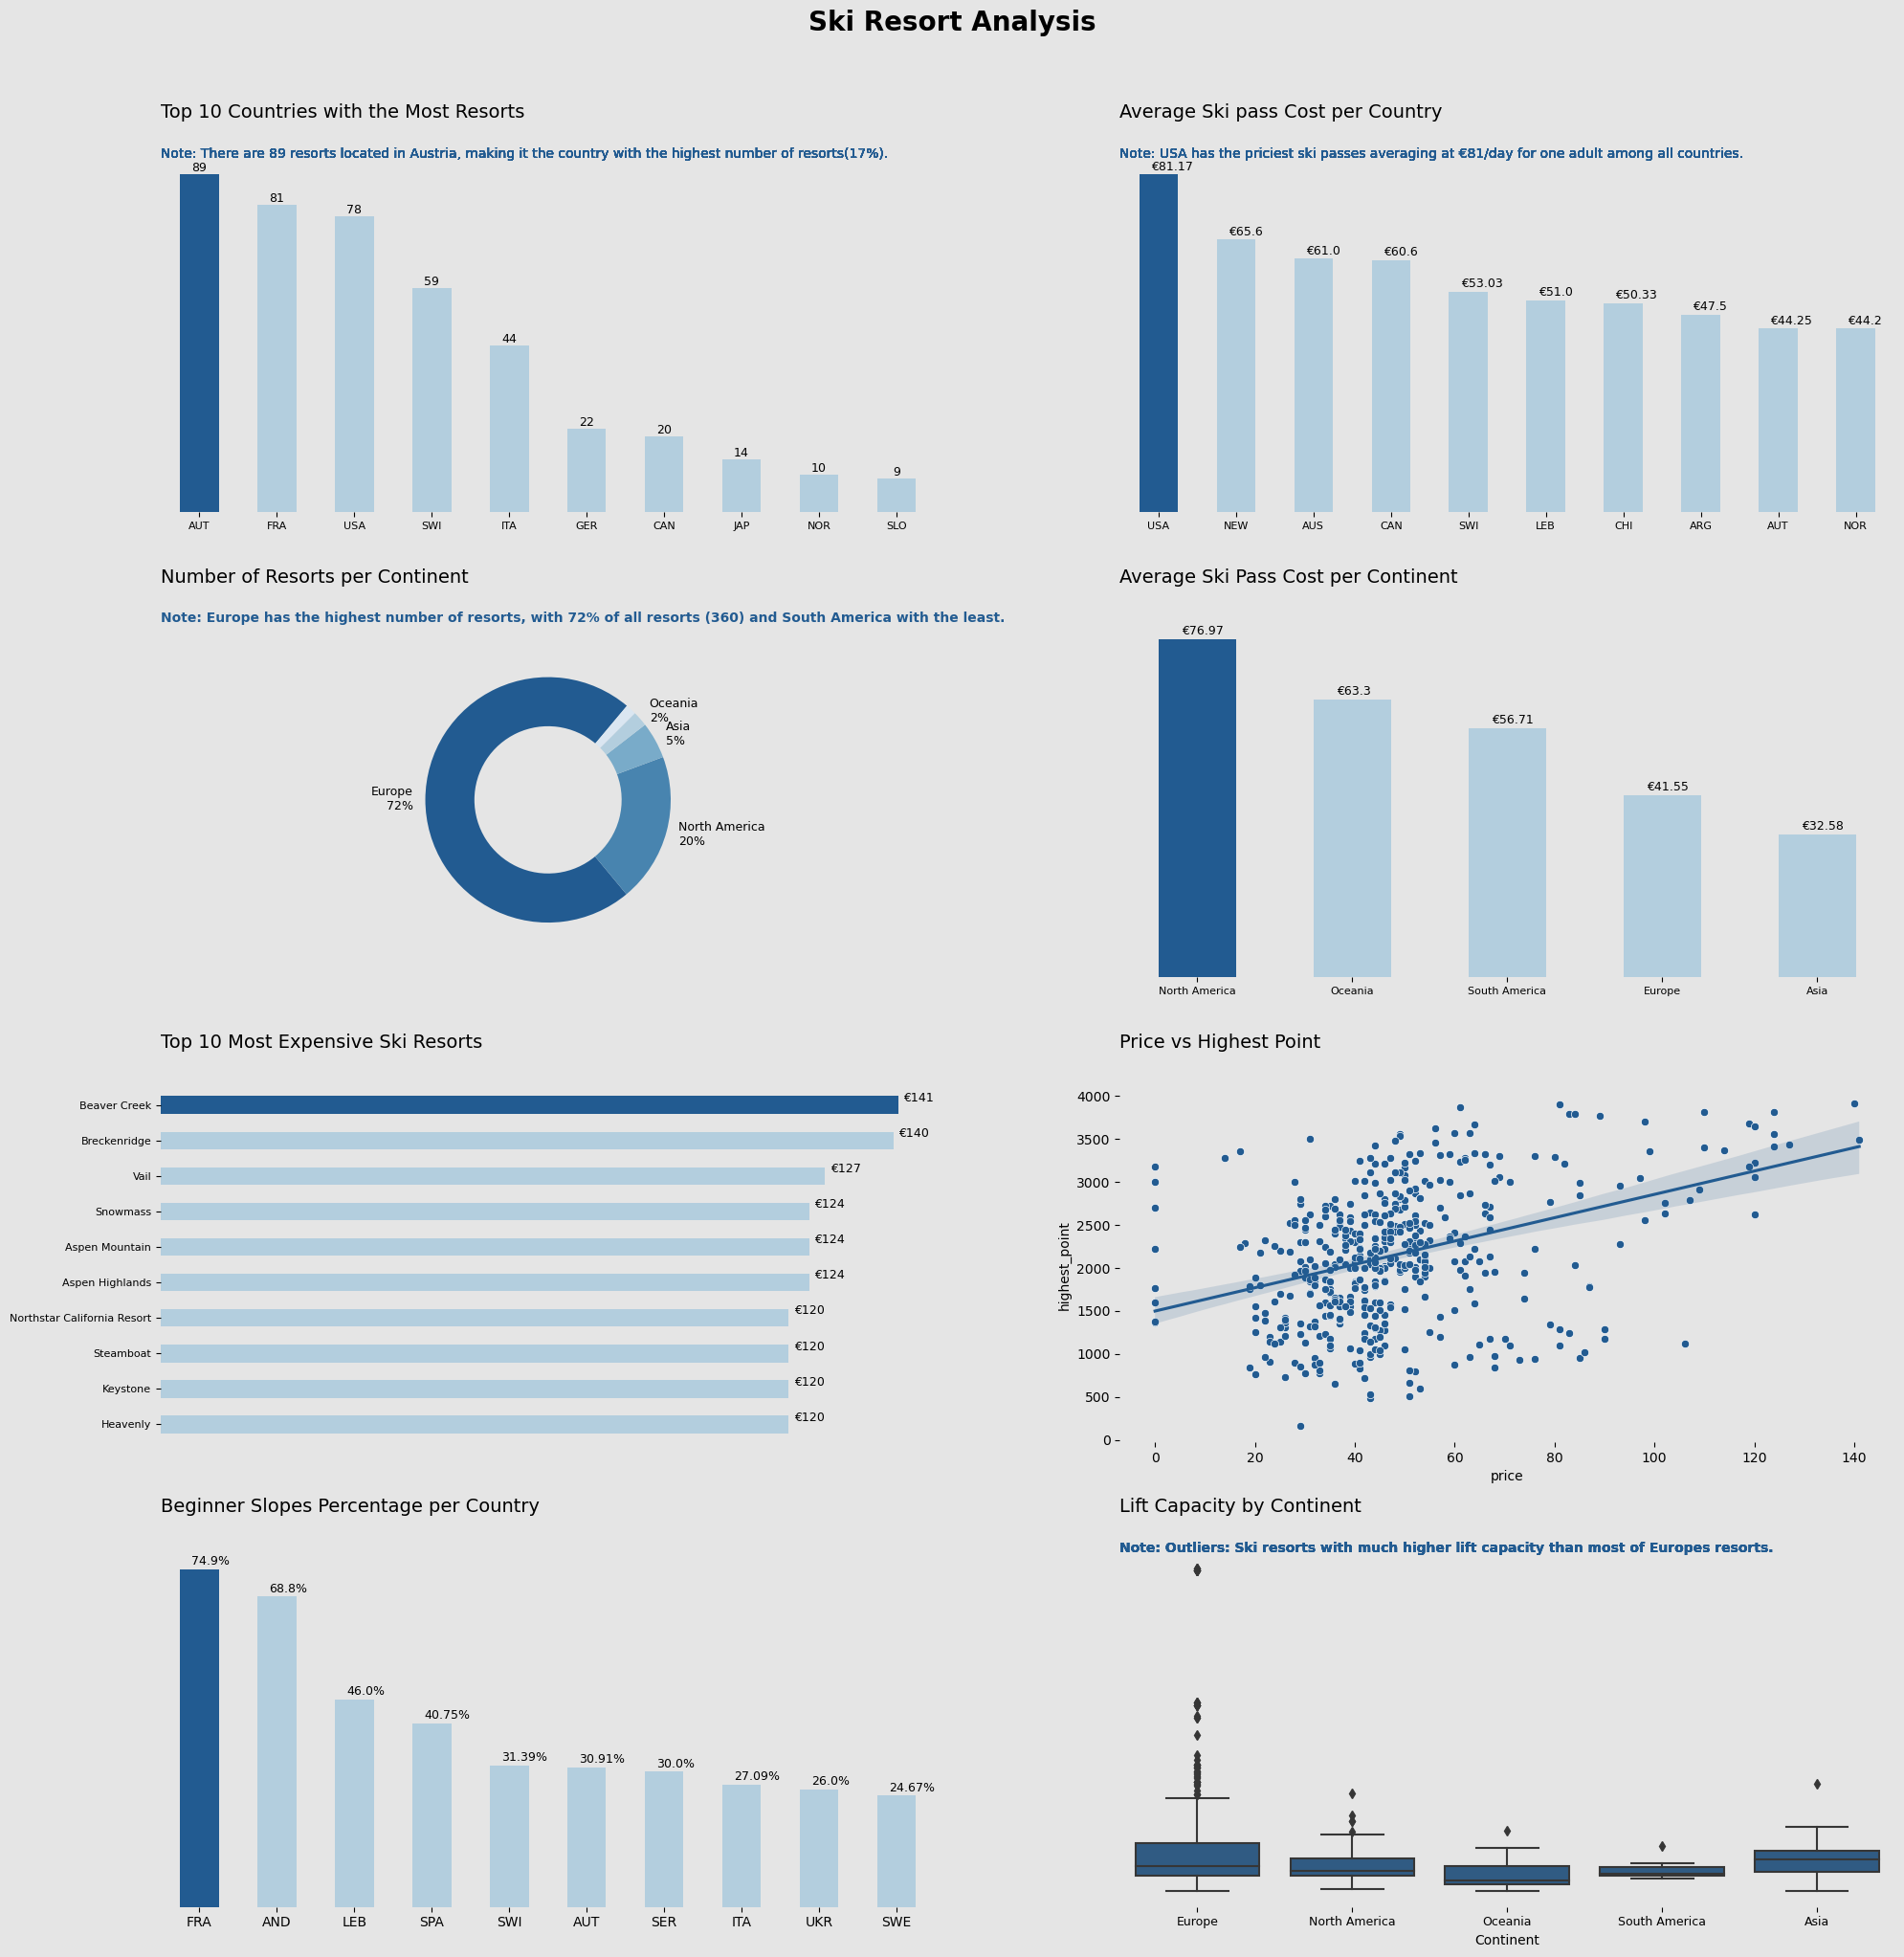

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

# Change Background Color
fig.patch.set_facecolor('#E5E5E5')
for ax in fig.get_axes():
    ax.patch.set_visible(False)

#remove all borders
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# plot 1
plt1 = resorts_per_country.head(10).plot(kind='bar', legend=False, ax=axs[0, 0])
plt1.set_title('Top 10 Countries with the Most Resorts', fontsize = 14, loc='left', pad=30)
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=9)
plt1.set_xlabel('')
plt1.set_yticks([], [])
plt1.tick_params(axis='x', rotation=0)
plt1.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt1.patches[i].set_facecolor('#B3CEDE')
    plt1.tick_params(axis='x', labelsize=8)
    plt1.text(0, 1, 'Note: There are 89 resorts located in Austria, making it the country with the highest number of resorts(17%).', fontsize=10, transform=plt1.transAxes, color='#225B91')

# plot 2
plt2 = avg_price_per_country.head(10).plot(kind='bar', legend=False, ax=axs[0, 1])
plt2.set_title('Average Ski pass Cost per Country', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(avg_price_per_country['price'][:10]):
    plt2.text(i-.1, v+1, '€'+str(v), color='black', fontsize=9)
plt2.set_xlabel('')
plt2.set_yticks([], [])
plt2.tick_params(axis='x', rotation=0)
plt2.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt2.patches[i].set_facecolor('#B3CEDE')
    plt2.tick_params(axis='x', labelsize=8)
    plt2.text(0, 1, 'Note: USA has the priciest ski passes averaging at €81/day for one adult among all countries.', fontsize=10, transform=plt2.transAxes, color='#225B91')
    
# plot 3
colors = ['#225B91', '#4884AF', '#79ABC9', '#B3CEDE', '#DAE6F1']
label = ['Europe\n72%', 'North America\n20%', 'Asia\n5%', 'Oceania\n2%', 'S.America\n1%']
axs[1, 0].pie(counts, labels=label, colors=colors, startangle=50, pctdistance= 0.85, wedgeprops={'width':0.4})
axs[1, 0].axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.7, facecolor='white')
plt.gca().add_artist(circle)
axs[1, 0].set_title('Number of Resorts per Continent', fontsize = 14, loc='left', pad=30)
axs[1, 0].set_xlim(-1.5, 1.5)
axs[1, 0].set_ylim(-1.5, 1.5)
axs[1, 0].set_autoscale_on(False)
for text in axs[1, 0].texts:
    text.set_fontsize(9)
axs[1, 0].texts[4].set_visible(False)
axs[1, 0].text(0, 1, 'Note: Europe has the highest number of resorts, with 72% of all resorts (360) and South America with the least.', fontsize=10, transform=axs[1, 0].transAxes, color='#225B91', weight='bold')

# plot 4
plt4 = avg_price_per_continent.plot(kind='bar', legend=False, ax=axs[1, 1])
plt4.set_title('Average Ski Pass Cost per Continent', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(avg_price_per_continent['price']):
    plt4.text(i-.1, v+1, '€'+str(v), color='black', fontsize=9)
plt4.set_xlabel('')
plt4.set_yticks([], [])
plt4.tick_params(axis='x', rotation=0)
plt4.patches[0].set_facecolor('#225B91')
for i in range(1, 5):
    plt4.patches[i].set_facecolor('#B3CEDE')
    plt4.tick_params(axis='x', labelsize=8)

# plot 5
plt5 = top_10_most_expensive_resorts.plot(kind='barh', x='resort', y='price', legend=False, ax=axs[2, 0])
plt5.set_title('Top 10 Most Expensive Ski Resorts', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(top_10_most_expensive_resorts['price']):
    plt5.text(v+1, i-.1, '€'+str(v), color='black', fontsize=9)
plt5.set_xlabel('')
plt5.set_xticks([], [])
plt5.tick_params(axis='y', rotation=0, labelsize=8)
plt5.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt5.patches[i].set_facecolor('#B3CEDE')
    plt5.invert_yaxis()
    plt5.set_ylabel('')

# plot 6
sns.scatterplot(x='price', y='highest_point', data=resorts, color='#225B91', ax=axs[2, 1])
axs[2, 1].set_title('Price vs Highest Point', fontsize = 14, loc='left', pad=30)
plt.xlabel('Price')
plt.ylabel('')
sns.regplot(x='price', y='highest_point', data=resorts, color='#225B91', scatter=False, ax=axs[2, 1])
for s in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[s].set_visible(False)
    plt.gca().tick_params(axis='both', labelsize=9)
    plt.gca().axes.get_yaxis().set_visible(False)

# plot 7
plt6 = beginner_slopes_per_country.head(10).plot(kind='bar', legend=False, ax=axs[3, 0])
plt6.set_title('Beginner Slopes Percentage per Country', fontsize = 14, loc='left', pad=30)
for i, v in enumerate(beginner_slopes_per_country.head(10)['beginner_slopes']):
    plt6.text(i-.1, v+1, str(v)+'%', color='black', fontsize=9)
plt6.set_xlabel('')
plt6.set_yticks([], [])
plt6.tick_params(axis='x', rotation=0)
plt6.patches[0].set_facecolor('#225B91')
for i in range(1, 10):
    plt6.patches[i].set_facecolor('#B3CEDE')

# plot 8
sns.boxplot(x='continent', y='lift_capacity', data=resorts, color='#225B91', ax=axs[3, 1])
plt.title('Lift Capacity by Continent', fontsize = 14, loc='left', pad=30)
plt.xlabel('Continent')
plt.ylabel('')
for s in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[s].set_visible(False)
    plt.gca().axes.get_yaxis().set_ticks([])
    plt.gca().text(0, 1, 'Note: Outliers: Ski resorts with much higher lift capacity than most of Europes resorts.', fontsize=10, transform=plt.gca().transAxes, color='#225B91', weight='bold')

fig.suptitle('Ski Resort Analysis', fontsize=20, y=1.02, weight='bold')

plt.tight_layout()
plt.show()
